In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
import yfinance as yfin

yfin.pdr_override()
import datetime as dt
start=dt.datetime(2020,1,1)
end=dt.datetime(2022,1,1)
df = yfin.download('TSLA',start,end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head(6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
2020-01-09,33.139999,33.253334,31.524668,32.089333,32.089333,426606000


In [ ]:
df.shape

(505, 6)

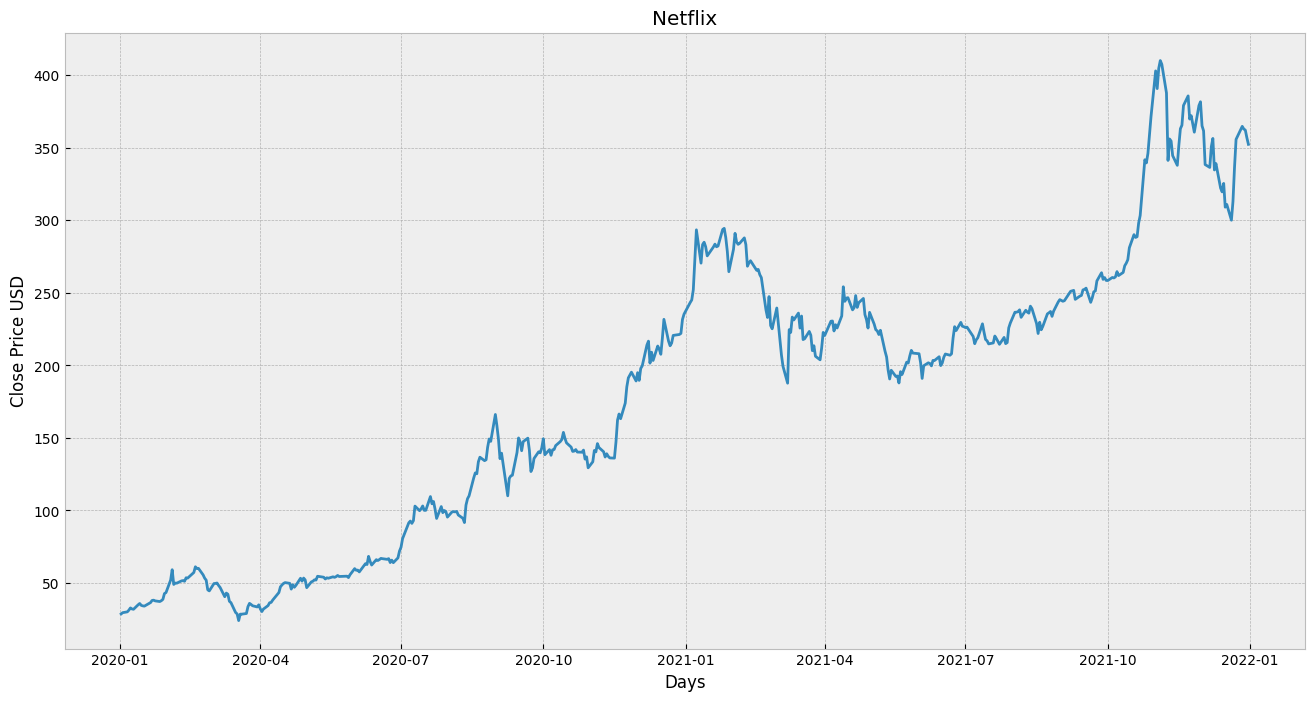

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.show()

In [ ]:
df=df[['Close']]


In [ ]:
# predict 'x' days in future
future_days=25

#create a new column (target) shifted 'x' uints/days up

df['Prediction']=df[['Close']].shift(-future_days)
df.tail(4)

<ipython-input-10-05b5fd1abced>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction']=df[['Close']].shift(-future_days)


,Close,Prediction
Date,,
2021-12-28,362.823334,NaN
2021-12-29,362.063324,NaN
2021-12-30,356.779999,NaN
2021-12-31,352.260010,NaN


In [ ]:
#create the feature data set(x) and convert it to a numpy array and remove the last 'x' days/rows

X=np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[ 28.68400002]
 [ 29.5340004 ]
 [ 30.10266685]
 [ 31.27066612]
 [ 32.8093338 ]
 [ 32.08933258]
 [ 31.87666702]
 [ 34.99066544]
 [ 35.86133194]
 [ 34.56666565]
 [ 34.23266602]
 [ 34.03333282]
 [ 36.47999954]
 [ 37.97066879]
 [ 38.14666748]
 [ 37.6546669 ]
 [ 37.20133209]
 [ 37.79333115]
 [ 38.73266602]
 [ 42.72066879]
 [ 43.37133408]
 [ 52.        ]
 [ 59.13733292]
 [ 48.97999954]
 [ 49.93066788]
 [ 49.87133408]
 [ 51.41866684]
 [ 51.62533188]
 [ 51.152668  ]
 [ 53.59999847]
 [ 53.33533478]
 [ 57.2266655 ]
 [ 61.16133118]
 [ 59.96066666]
 [ 60.06666565]
 [ 55.58599854]
 [ 53.32733154]
 [ 51.91999817]
 [ 45.26666641]
 [ 44.53266525]
 [ 49.57466888]
 [ 49.70066833]
 [ 49.96666718]
 [ 48.30266571]
 [ 46.89866638]
 [ 40.53333282]
 [ 43.02199936]
 [ 42.2820015 ]
 [ 37.36999893]
 [ 36.44133377]
 [ 29.67133331]
 [ 28.68000031]
 [ 24.08133316]
 [ 28.50933266]
 [ 28.50200081]
 [ 28.95266724]
 [ 33.66666794]
 [ 35.95000076]
 [ 35.21066666]
 [ 34.29066849]
 [ 33.47533417]
 [ 34.93333435]
 [ 32.10

<ipython-input-11-de45ffb57504>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=np.array(df.drop(['Prediction'],1))[:-future_days]


In [ ]:
# Create the target data set (y) and convert it to a numpy array and get all of the target vaues except the last n days or rows
y=np.array(df['Prediction'])[:-future_days]
print(y)


[ 49.87133408  51.41866684  51.62533188  51.152668    53.59999847
  53.33533478  57.2266655   61.16133118  59.96066666  60.06666565
  55.58599854  53.32733154  51.91999817  45.26666641  44.53266525
  49.57466888  49.70066833  49.96666718  48.30266571  46.89866638
  40.53333282  43.02199936  42.2820015   37.36999893  36.44133377
  29.67133331  28.68000031  24.08133316  28.50933266  28.50200081
  28.95266724  33.66666794  35.95000076  35.21066666  34.29066849
  33.47533417  34.93333435  32.10400009  30.29800034  32.00066757
  34.41600037  36.36333466  36.58933258  38.20000076  43.39666748
  47.32600021  48.65533447  49.68066788  50.25933456  49.75733185
  45.78133392  48.8073349   47.04199982  48.3433342   53.25
  51.27466583  53.36733246  52.12533188  46.75466537  50.74599838
  51.2140007   52.17200089  52.00266647  54.62799835  54.08599854
  53.96066666  52.73066711  53.55533218  53.27799988  54.24200058
  53.86733246  54.3706665   55.17333221  54.45866776  54.59133148
  54.68199921  5

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
tree = DecisionTreeRegressor().fit(x_train,y_train)
lr=LinearRegression().fit(x_train,y_train)

In [ ]:
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

<ipython-input-15-6675df72f1ab>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future=df.drop(['Prediction'],1)[:-future_days]


array([[298.        ],
       [303.22665405],
       [341.61999512],
       [339.47665405],
       [345.95333862],
       [359.01333618],
       [371.33334351],
       [402.86334229],
       [390.66665649],
       [404.61999512],
       [409.97000122],
       [407.36334229],
       [387.64666748],
       [341.16665649],
       [355.9833374 ],
       [354.50332642],
       [344.47332764],
       [337.79666138],
       [351.57666016],
       [363.00332642],
       [365.45999146],
       [379.01998901],
       [385.62332153],
       [369.67666626],
       [372.        ]])

In [ ]:
tree_prediction=tree.predict(x_future)
print(tree_prediction)
print()

lr_prediction=lr.predict(x_future)
print(lr_prediction)

[360.64001465 378.99667358 381.58666992 365.         361.5333252
 308.97332764 352.26000977 350.58334351 356.32000732 334.6000061
 339.01000977 322.13665771 319.50332642 325.32998657 308.97332764
 308.97332764 361.5333252  365.         336.29000854 308.97332764
 352.26000977 362.82333374 362.06332397 352.26000977 352.26000977]

[306.21734153 311.13154143 347.22969352 345.21448334 351.3039858
 363.58324478 375.16675082 404.81185749 393.34430071 406.46349602
 411.49367387 409.04284339 390.5048494  346.80345589 360.73438209
 359.34284752 349.91245122 343.63492216 356.59114004 367.33470976
 369.64451312 382.39388164 388.60246092 373.60911125 375.79355398]


<ipython-input-17-b7f45ff074db>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


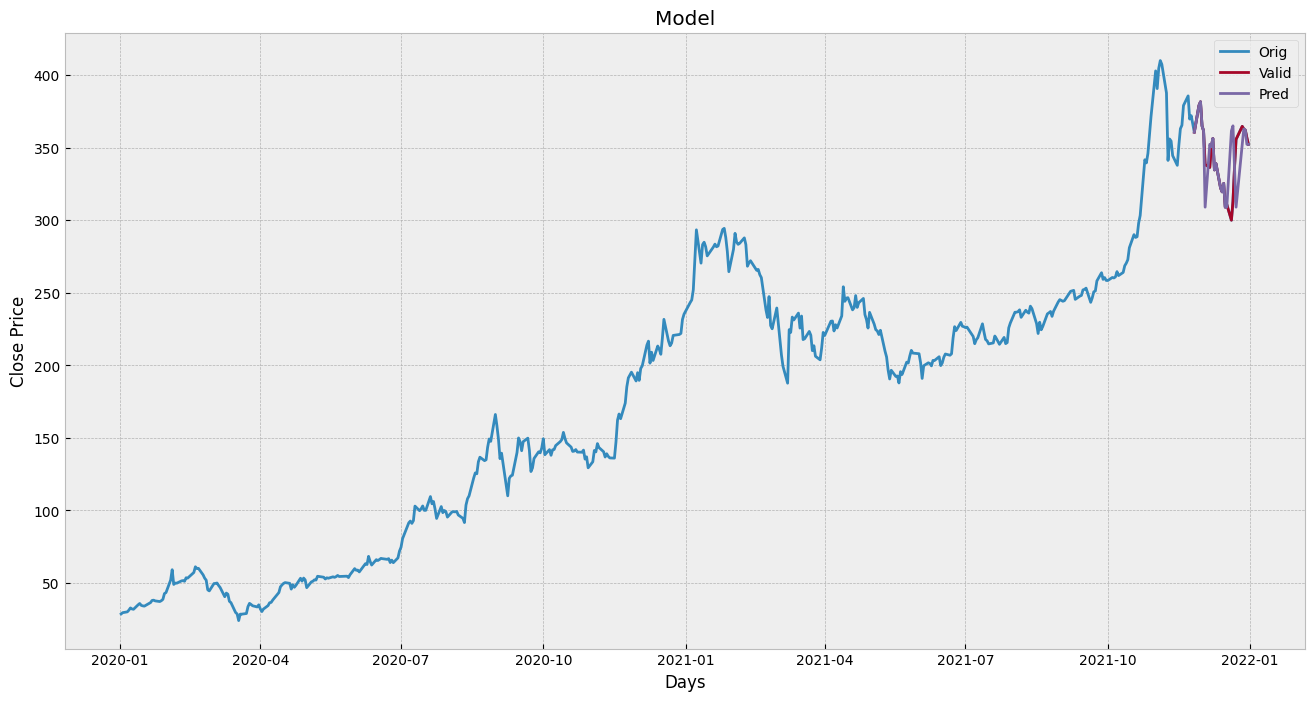

In [ ]:
predictions=tree_prediction

valid=df[X.shape[0]:]

valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig','Valid','Pred'])

<ipython-input-18-ecfef54e0f09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


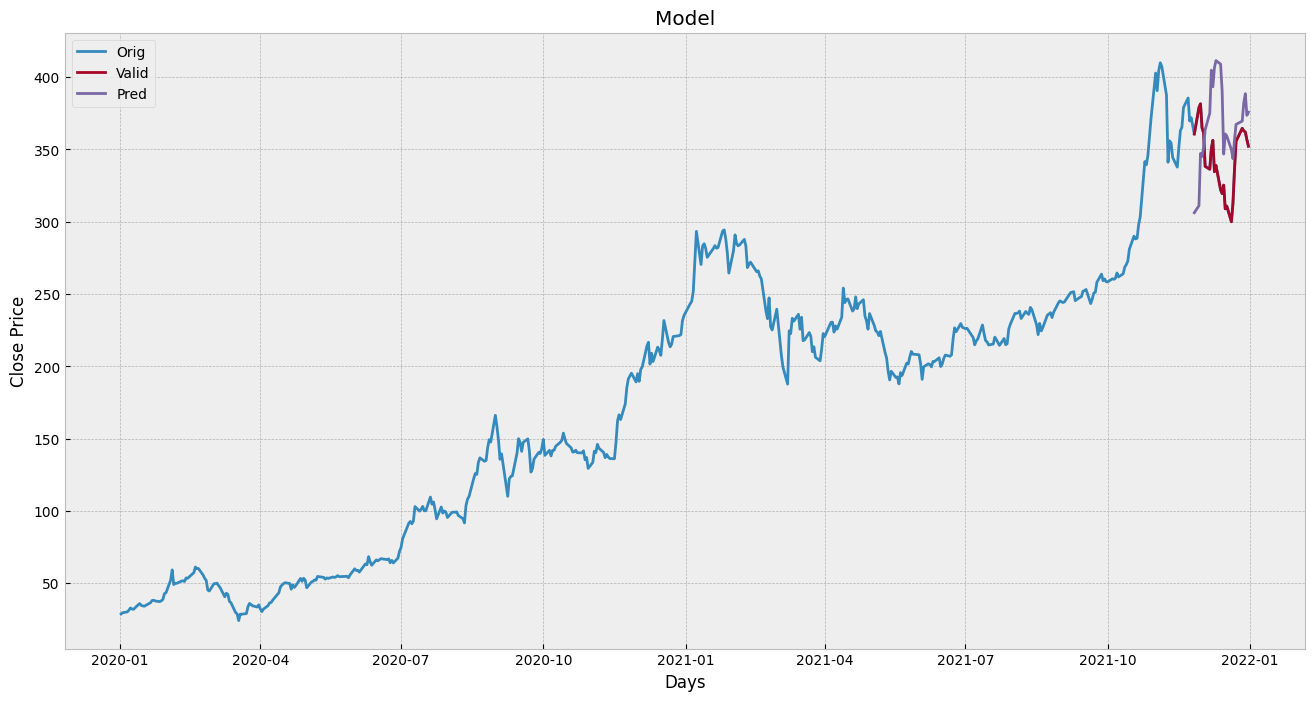

In [ ]:
predictions=lr_prediction

valid=df[X.shape[0]:]

valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig','Valid','Pred'])